<a href="https://colab.research.google.com/github/CodeWithMayank-Py/ML-Models/blob/main/cifar_100_CNN_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
# Checking tensorflow version
tf.__version__

'2.13.0'

In [ ]:
# Download Data
train, valid, test = tfds.load('cifar100', split=['train[:80%]','train[80%:]','test'], as_supervised=True, batch_size=32,shuffle_files=True)

In [ ]:
print('Element in training data: ',train.element_spec)
print('Element in valid data: ',valid.element_spec)
print('Element in test data: ',test.element_spec)
print('Image count:',train.cardinality()*32)
print('Image count:',valid.cardinality()*32)
print('Image count:',test.cardinality()*32)

Element in training data:  (TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
Element in valid data:  (TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
Element in test data:  (TensorSpec(shape=(None, 32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))
Image count: tf.Tensor(40000, shape=(), dtype=int64)
Image count: tf.Tensor(10016, shape=(), dtype=int64)
Image count: tf.Tensor(10016, shape=(), dtype=int64)


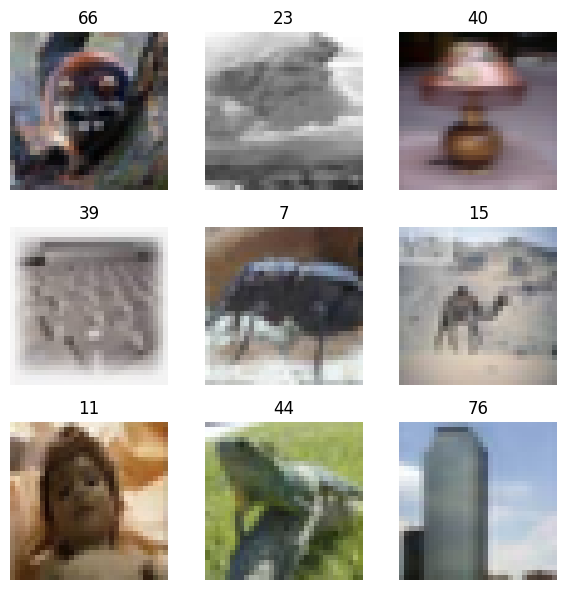

In [ ]:
# make plot data
for images, labels in train.take(1):break
images_to_plot : int=9
plt.figure(figsize=(6,6))
for index in range(images_to_plot):
  plt.subplot(3,3,index+1)
  plt.imshow(images[index].numpy().astype('uint8'))
  plt.axis('off')
  plt.title(labels[index].numpy())
plt.tight_layout()
plt.show()

In [ ]:
print("Maximum pixel values: ", tf.reduce_max(images))
print("Minimum pixel values: ", tf.reduce_min(images))
print("Shape of inputs (X): ", images.shape)              # (32, 32, 32, 3) => (batch_size, height, width, channels)
print("Object type of inputs (X): ", type(images))
print("Data Type in inputs (X): ", images.dtype)
print("Object type of outputs (y): ", type(labels))
print("Data type in outputs (X): ", labels.dtype)

Maximum pixel values:  tf.Tensor(255, shape=(), dtype=uint8)
Minimum pixel values:  tf.Tensor(0, shape=(), dtype=uint8)
Shape of inputs (X):  (32, 32, 32, 3)
Object type of inputs (X):  <class 'tensorflow.python.framework.ops.EagerTensor'>
Data Type in inputs (X):  <dtype: 'uint8'>
Object type of outputs (y):  <class 'tensorflow.python.framework.ops.EagerTensor'>
Data type in outputs (X):  <dtype: 'int64'>


In [ ]:
'''
resizing_layer = tf.keras.layers.Resizing(height=128, width=128, interpolation="bilinear")
train=train.map(lambda images,labels: (resizing_layer(images),labels))
valid=valid.map(lambda images,labels: (resizing_layer(images),labels))
test=test.map(lambda images,labels: (resizing_layer(images),labels))
'''

'\nresizing_layer = tf.keras.layers.Resizing(height=128, width=128, interpolation="bilinear")\ntrain=train.map(lambda images,labels: (resizing_layer(images),labels))\nvalid=valid.map(lambda images,labels: (resizing_layer(images),labels))\ntest=test.map(lambda images,labels: (resizing_layer(images),labels))\n'

In [ ]:
# Make apply data augmentation
random_flip = tf.keras.layers.RandomFlip('horizontal_and_vertical', name='random_flip')
random_zoom = tf.keras.layers.RandomZoom(height_factor = 0.1, width_factor=0.1, name='random_zoom')
random_rotate = tf.keras.layers.RandomRotation(0.3, name='random_rotate')
random_brightness = tf.keras.layers.RandomBrightness(0.3, value_range=(0.0, 255.0), name='random_brightness')
augmentations = [random_flip, random_zoom, random_rotate, random_brightness]

# make apply augmentation on training data
for augmentation in augmentations:
  train = train.map(lambda images, labels: (augmentation(images), labels))

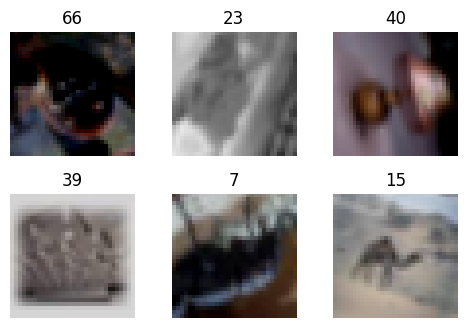

In [ ]:
# make plot data after applying augmentation
for images, labels in train.take(1):break
images_to_plot : int=6
plt.figure(figsize=(5,5))
for index in range(images_to_plot):
  plt.subplot(3,3,index+1)
  plt.imshow(images[index].numpy().astype('uint8'))
  plt.axis('off')
  plt.title(labels[index].numpy())
plt.tight_layout()
plt.show()

In [ ]:
print("Maximum pixel values: ", tf.reduce_max(images))
print("Minimum pixel values: ", tf.reduce_min(images))
print("Shape of inputs (X): ", images.shape)
print("Object type of inputs (X): ", type(images))
print("Data Type in inputs (X): ", images.dtype)
print("Object type of outputs (y): ", type(labels))
print("Data type in outputs (X): ", labels.dtype)

Maximum pixel values:  tf.Tensor(255.0, shape=(), dtype=float32)
Minimum pixel values:  tf.Tensor(0.0, shape=(), dtype=float32)
Shape of inputs (X):  (32, 32, 32, 3)
Object type of inputs (X):  <class 'tensorflow.python.framework.ops.EagerTensor'>
Data Type in inputs (X):  <dtype: 'float32'>
Object type of outputs (y):  <class 'tensorflow.python.framework.ops.EagerTensor'>
Data type in outputs (X):  <dtype: 'int64'>


In [ ]:
model = tf.keras.Sequential(layers=None, name='resisc45_classifier')
# add rescaling layer to rescale inputs from (0, 255) to (0, 1)
model.add(tf.keras.layers.Rescaling(1./255., offset=0, name='rescaling_01', input_shape=(32, 32, 3)))

# first forward passs
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.Dense(120))

In [ ]:
model.summary()

Model: "resisc45_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_01 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)              6423552   
                                               